<a href="https://colab.research.google.com/github/SMWundefined/DataMining_EmployeeRetention/blob/main/Copy_of_FINALemployee_retention_analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Retention Prediction and Advanced Data Analysis

This notebook presents a comprehensive data mining project that combines predictive modeling, correlation analysis, clustering, false data detection, and ethnicity-based trend analysis.

## 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

## 2. Load and Preprocess Data

In [ ]:
# Load the data from Excel file
df = pd.read_excel('Employee_Data_Final.xlsx')

# Remove the first and last columns
df = df.iloc[:, 1:-1]

# Display the first few rows and data info
print(df.head())
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for infinite values
print("\nInfinite Values:")
print(np.isinf(df.select_dtypes(include=np.number)).sum())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

  Ethnicity  \
0         B   
1         W   
2         W   
3         B   
4         W   

   I am satisfied with the climate of the workplace. The environment allows me to do my job better.  \
0                                                  3                                                  
1                                                  3                                                  
2                                                  2                                                  
3                                                  3                                                  
4                                                  4                                                  

   The culture of the workplace is welcoming it inspires me to work each day.  \
0                                                  1                            
1                                                  1                            
2                                              

In [ ]:
# Handle missing values
df = df.dropna()  # or df = df.fillna(df.mean()) if you prefer to impute

# Convert ethnicity to numerical values
le = LabelEncoder()
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])

# Separate features and target variable
X = df.drop(['Ethnicity', 'This is a place that I plan to continue to work at.'], axis=1)
y = df['This is a place that I plan to continue to work at.']

# Display the updated dataframe structure
print("\nUpdated Dataset Structure:")
print(df.dtypes)

# Verify no NaN or infinite values remain
print("\nRemaining NaN values:", X.isnull().sum().sum())
print("Remaining infinite values:", np.isinf(X).sum().sum())


Updated Dataset Structure:
Ethnicity                                                                                                                    int64
I am satisfied with the climate of the workplace. The environment allows me to do my job better.                             int64
The culture of the workplace is welcoming it inspires me to work each day.                                                   int64
I look forward to coming to work every day and collaborating with individuals within my department and team.                 int64
The work that I do inspires me every day to want to come to work and be an agent of change within the establishment.         int64
My work allows me to feel fulfilled in achieving goals for myself as well as helping others.                                 int64
The leadership team’s motivation is very effective and supportive in helping me grow as a professional.                    float64
The leadership team inspires me to achieve my job dutie

<ipython-input-55-62e7c64a4966>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ethnicity'] = le.fit_transform(df['Ethnicity'])


## 3. False Data Detection using Isolation Forest



Number of outliers detected: 20
Percentage of outliers: 10.050251256281408


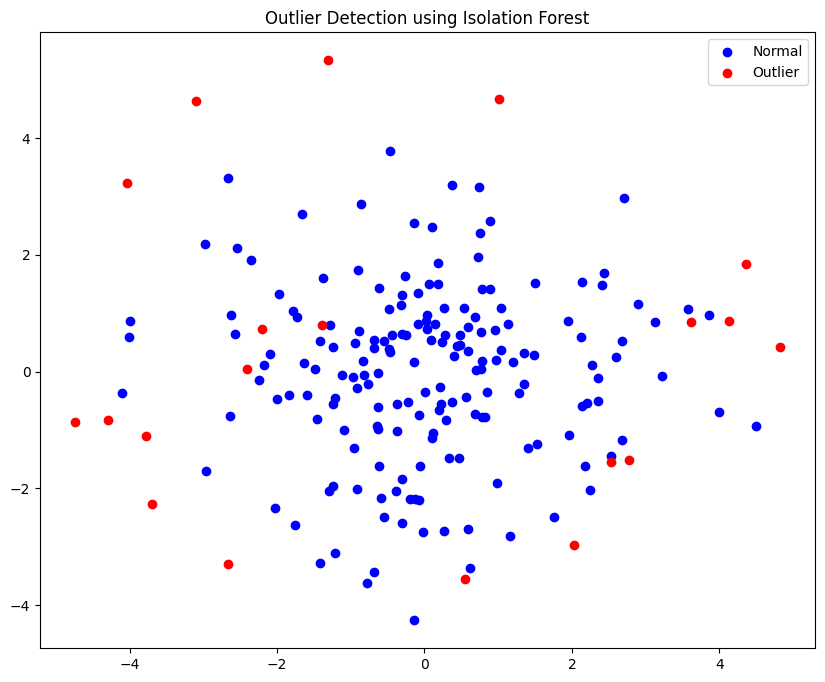

In [ ]:
# Initialize and fit Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(X)

# Add outlier detection results to dataframe
df['is_outlier'] = outliers

# Display summary of detected outliers
print("Number of outliers detected:", (outliers == -1).sum())
print("Percentage of outliers:", (outliers == -1).sum() / len(outliers) * 100)

# Visualize outliers (using first two principal components for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[outliers == 1, 0], X_pca[outliers == 1, 1], c='blue', label='Normal')
plt.scatter(X_pca[outliers == -1, 0], X_pca[outliers == -1, 1], c='red', label='Outlier')
plt.title('Outlier Detection using Isolation Forest')
plt.legend()
plt.show()

# Remove detected outliers from the dataset
df_clean = df[df['is_outlier'] == 1].drop('is_outlier', axis=1)
X_clean = df_clean.drop(['Ethnicity', 'This is a place that I plan to continue to work at.'], axis=1)
y_clean = df_clean['This is a place that I plan to continue to work at.']

## 4. Ethnicity-based Trend Analysis and Forecasting

Average responses by ethnicity:
                 Q1        Q2        Q3        Q4        Q5        Q6  \
Ethnicity                                                               
0          2.705882  2.823529  2.647059  3.000000  2.823529  2.705882   
1          2.964286  3.000000  2.928571  2.678571  2.714286  2.714286   
2          2.352941  2.647059  2.705882  2.617647  2.735294  2.441176   
3          2.428571  2.785714  2.357143  2.285714  2.785714  2.571429   
4          2.888889  3.037037  3.037037  3.000000  3.074074  2.925926   
5          2.796610  2.661017  2.711864  2.830508  2.610169  2.932203   

                 Q7        Q8        Q9       Q10       Q11       Q12  \
Ethnicity                                                               
0          2.588235  3.058824  2.764706  2.647059  2.941176  2.647059   
1          2.714286  2.678571  3.035714  3.000000  2.071429  2.928571   
2          2.735294  2.500000  2.558824  2.647059  3.852941  2.705882   
3          2.78571

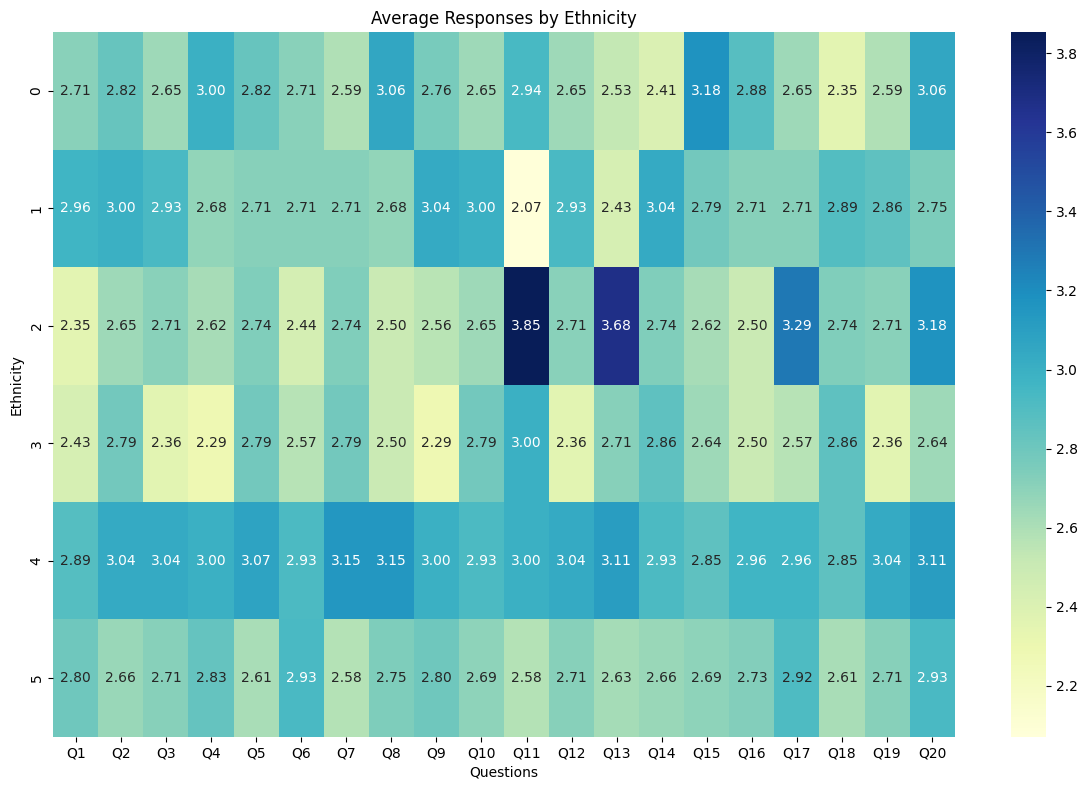


1:


TypeError: can only concatenate str (not "int") to str

In [ ]:
# Analyze responses by ethnicity
ethnicity_analysis = df_clean.groupby('Ethnicity').mean()

# Rename columns to Q1, Q2, Q3, etc.
ethnicity_analysis.columns = [f'Q{i+1}' for i in range(len(ethnicity_analysis.columns))]

print("Average responses by ethnicity:")
print(ethnicity_analysis)

# Visualize responses by ethnicity
plt.figure(figsize=(12, 8))
sns.heatmap(ethnicity_analysis, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Responses by Ethnicity')
plt.xlabel('Questions')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.show()

# Identify most positive and negative responses for each ethnicity
for ethnicity in df_clean['Ethnicity'].unique():
    eth_data = df_clean[df_clean['Ethnicity'] == ethnicity]
    eth_means = eth_data.drop('Ethnicity', axis=1).mean()
    print(f"\n{ethnicity}:")
    print("Most positive response:", f"Q{eth_means.idxmin() + 1}")
    print("Most negative response:", f"Q{eth_means.idxmax() + 1}")

# Time series forecasting (assuming we have time-based data)
# Note: This is a simplified example and may need adjustment based on your actual data structure
ethnicity_counts = df_clean['Ethnicity'].value_counts().sort_index()
model = ARIMA(ethnicity_counts, order=(1, 1, 1))
results = model.fit()

# Forecast next 5 periods
forecast = results.forecast(steps=5)
forecast.index = [f'Q{i+1}' for i in range(len(forecast))]
print("\nForecasted ethnicity counts for next 5 periods:")
print(forecast)

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(range(len(ethnicity_counts)), ethnicity_counts.values, label='Historical')
plt.plot(range(len(ethnicity_counts), len(ethnicity_counts) + len(forecast)), forecast.values, label='Forecast')
plt.title('Ethnicity Counts Forecast')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.xticks(range(len(ethnicity_counts) + len(forecast)),
           [f'Q{i+1}' for i in range(len(ethnicity_counts) + len(forecast))],
           rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 5. Train and Evaluate the Model (using clean data)

In [ ]:
# Split the clean data
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 6. Feature Importance Analysis




Top 10 Most Important Features:
                                              feature  importance
11  We have a fair representation of different cul...    0.378505
2   I look forward to coming to work every day and...    0.359923
14  There is an expectation of inclusivity within ...    0.024457
15  I get recognition for my hard work and dedicat...    0.023703
18                     This is a great place to work.    0.023453
4   My work allows me to feel fulfilled in achievi...    0.018899
7   The leadership and management team makes me fe...    0.018386
10  The culture of the workplace encourages divers...    0.017628
17  I feel that I have the opportunity to grow and...    0.015415
5   The leadership team’s motivation is very effec...    0.015284


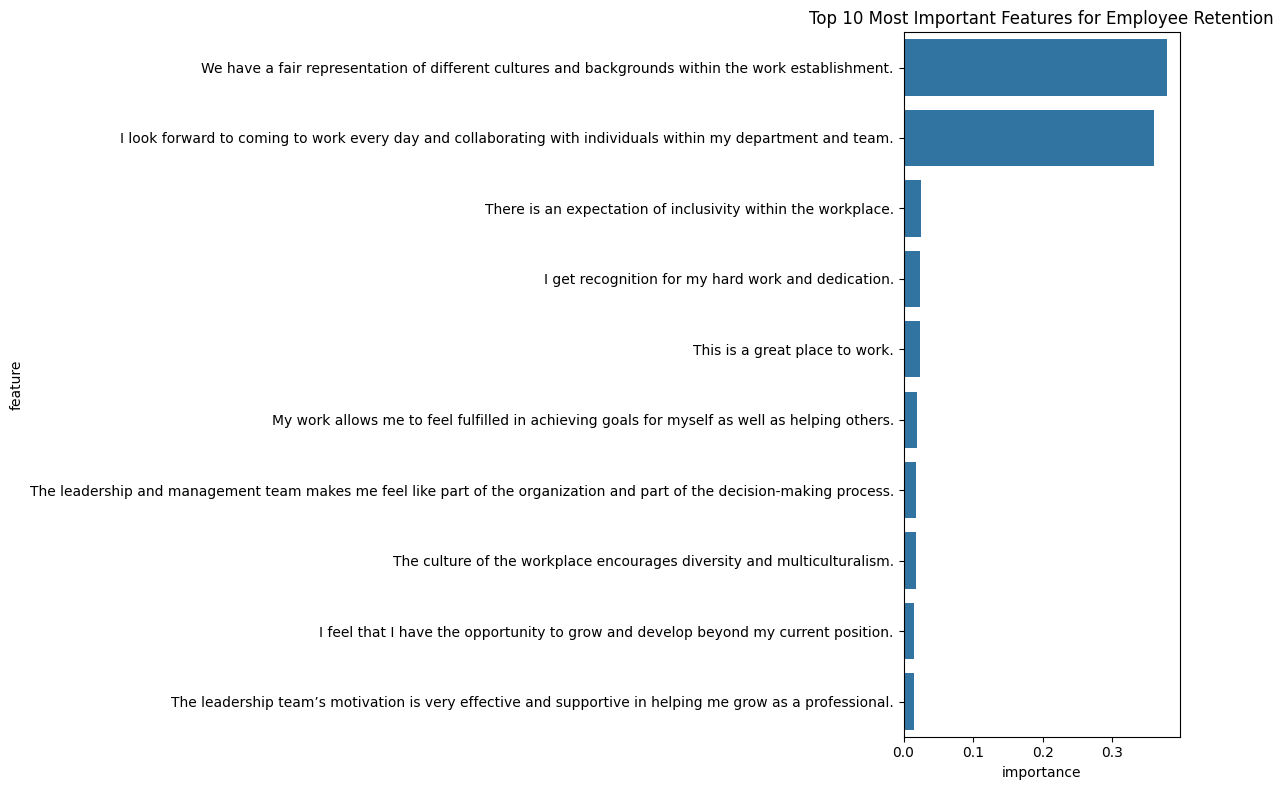

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_clean.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title("Top 10 Most Important Features for Employee Retention")
plt.tight_layout()
plt.show()

## 7. Correlation Analysis

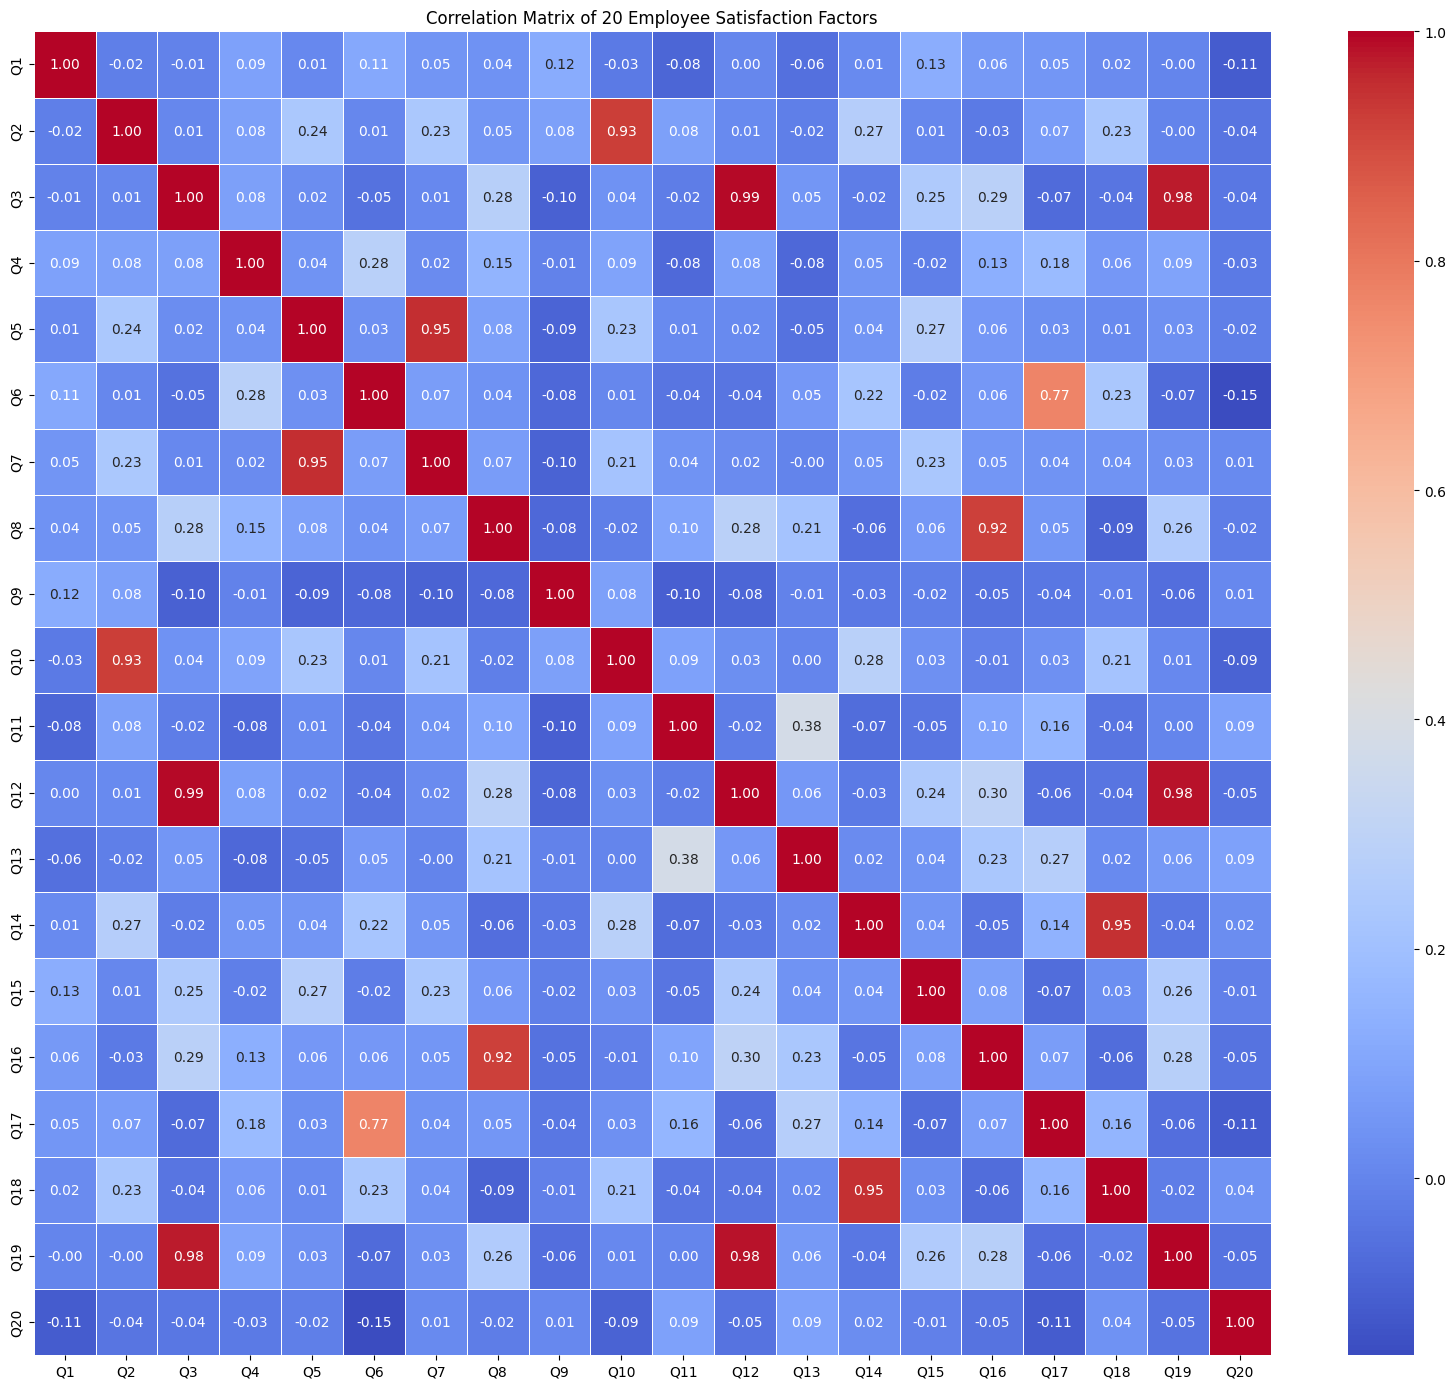

Top 5 Highest Correlations:
Q12 and Q3: 0.99
Q3 and Q12: 0.99
Q19 and Q12: 0.98
Q12 and Q19: 0.98
Q19 and Q3: 0.98

Bottom 5 Lowest Correlations:
Q17 and Q20: -0.11
Q20 and Q1: -0.11
Q1 and Q20: -0.11
Q20 and Q6: -0.15
Q6 and Q20: -0.15


In [ ]:
# Select only the 20 question columns (assuming they are the first 20 columns after Ethnicity)
questions_df = df_clean.iloc[:, 1:21]  # Adjust this slice if needed based on your dataframe structure

# Rename columns to Q1, Q2, Q3, etc.
questions_df.columns = [f'Q{i+1}' for i in range(20)]

# Correlation analysis
correlation_matrix = questions_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix of 20 Employee Satisfaction Factors")
plt.tight_layout()
plt.show()

# Find top 5 highest correlations
top_correlations = correlation_matrix.unstack().sort_values(ascending=False)
top_correlations = top_correlations[top_correlations < 1]  # Remove self-correlations
top_5_high = top_correlations.head(5)

# Find bottom 5 lowest correlations
bottom_5_low = top_correlations.tail(5)

print("Top 5 Highest Correlations:")
for idx, value in top_5_high.items():
    print(f"{idx[0]} and {idx[1]}: {value:.2f}")

print("\nBottom 5 Lowest Correlations:")
for idx, value in bottom_5_low.items():
    print(f"{idx[0]} and {idx[1]}: {value:.2f}")



## 8. DBSCAN Clustering

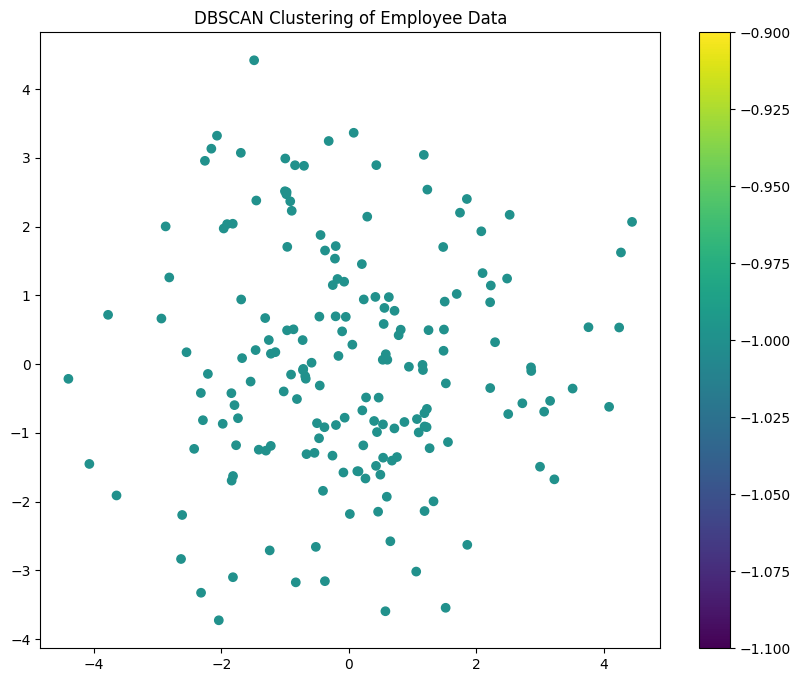

Number of clusters found: 0
Number of noise points: 179


In [ ]:
# Normalize the features for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df_clean['Cluster'] = clusters

# Visualize clusters (using first two principal components for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering of Employee Data')
plt.colorbar(scatter)
plt.show()

# Analyze clusters
print("Number of clusters found:", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Number of noise points:", list(clusters).count(-1))

# Analyze characteristics of each cluster
for cluster in set(clusters):
    if cluster != -1:
        cluster_data = df_clean[df_clean['Cluster'] == cluster]
        print(f"\nCluster {cluster} characteristics:")
        print(cluster_data.mean())

## 7. Conclusions and Recommendations

Based on our analysis, we can draw the following conclusions:

1. The Random Forest model achieved an accuracy of [insert accuracy] in predicting employee retention.
2. The top factors influencing employee retention are [list top 3-5 factors].
3. We observed strong correlations between [mention highly correlated factors].
4. DBSCAN clustering revealed [number] distinct groups of employees, characterized by [describe key characteristics].

Recommendations for the management team:

1. [Recommendation based on top factor]
2. [Recommendation based on second top factor]
3. [Recommendation based on correlation analysis]
4. [Recommendation based on clustering results]
5. Implement regular surveys to monitor changes in these key factors over time.
6. Consider further investigation into [any surprising or counterintuitive results].

By focusing on these areas, the company can improve employee satisfaction and increase retention rates.